In [1]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import datasets

os.chdir("C:\\Users\lhuang\PycharmProjects\pyLearng\logistic_regression_maxium_liklihood")

##  Maximum Likelihood Method (MLE)

### likelihood (L) or the joint probability

$ L=P_1*P_2*...*P_n*(1-P_i)*...*(1-P_n) \\
   =\prod_{i=1,y=1}^{n}P_i*\prod_{i=1,y=0}^{n}(1-P_i)$
   
$Pi=\dfrac{e^{a+b*X_i}}{1+e^{a+b*X_i}}=\dfrac{1}{1+e^{-(a+b*X_i)}}$

### Log likelihood funmction
$L(X|P)=\sum_{i=1,y_i=1}^{n}logP(x_i)+\sum_{i=1,y_i=0}log(1-P(x_i))$

#### The first derivation of the Log likelihood function:

$\nabla_bL=\sum_{i=1}^{N}y_ix_i-P_ix_i$

Matrix: $X(Y-P)$

#### The second derivation of the Log likelihood function:

$H=\frac{\partial}{\partial b}\nabla_bL=-\sum_{i=1}^{N}x_iPi(1-P)x_i^T$

Matrix: $XWX^{T}$

W is a diagonal matrix containing the product of probabilities in the diagonal.

#### Use the Newton-Raphson method to update the beta coefficients (b) by adding root differences

root differences: $\Delta b=(XWX^{T})^{-1}X(Y-P)$

updated b: $b=b+\Delta b$


### X matrix
X shape=(m,n+1)

$
X = 
\begin{pmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,n} & a \\
x_{2,1} & x_{2,2} & \cdots & x_{2,n} & a\\
\vdots & \vdots & \ddots & \vdots &\vdots \\
x_{m,1} & x_{m,2} & \cdots & x_{m,n} & a 
\end{pmatrix}
$

### B matrix
B shape: (n+1,1)

$
B= 
\begin{pmatrix}
b_{1}  \\
b_{2} \\
\vdots \\
b_{n+1} 
\end{pmatrix}
$


### Data Preparation

In [2]:
bank_final=pd.read_csv('bankfinal.csv')


In [3]:
cols=['previous', 'euribor3m', 'job_entrepreneur', 'job_self-employed',
      'poutcome_success', 'poutcome_failure', 'month_oct', 'month_may',
      'month_mar', 'month_jun', 'month_jul', 'month_dec']
X=bank_final[cols]
Y=bank_final['y']

X.head()

,previous,euribor3m,job_entrepreneur,job_self-employed,poutcome_success,poutcome_failure,month_oct,month_may,month_mar,month_jun,month_jul,month_dec
0,0,1.313,0,0,0,0,0,1,0,0,0,0
1,0,4.855,0,0,0,0,0,1,0,0,0,0
2,0,4.962,0,0,0,0,0,0,0,1,0,0
3,0,4.959,0,0,0,0,0,0,0,1,0,0
4,0,4.191,0,0,0,0,0,0,0,0,0,0


In [4]:
Y.value_counts()

0    3668
1     451
Name: y, dtype: int64

In [6]:
nrow=np.shape(X)[0]
inter=np.ones(nrow).reshape(nrow,1)
X_new=np.append(X,inter,axis=1)
ncol=np.shape(X_new)[1]
beta=np.zeros(ncol).reshape(ncol,1)
root_diff=np.array(range(1,ncol+1)).reshape(ncol,1)

print(f"beta(b) shape:{beta.shape}")
print(f"root diff shape:{root_diff.shape}")
print(f"X_new Data:{X_new.shape}")
X_add_inter=X.copy()
X_add_inter['inter']=inter
X_add_inter.head()

beta(b) shape:(13, 1)
root diff shape:(13, 1)
X_new Data:(4119, 13)


,previous,euribor3m,job_entrepreneur,job_self-employed,poutcome_success,poutcome_failure,month_oct,month_may,month_mar,month_jun,month_jul,month_dec,inter
0,0,1.313,0,0,0,0,0,1,0,0,0,0,1.0
1,0,4.855,0,0,0,0,0,1,0,0,0,0,1.0
2,0,4.962,0,0,0,0,0,0,0,1,0,0,1.0
3,0,4.959,0,0,0,0,0,0,0,1,0,0,1.0
4,0,4.191,0,0,0,0,0,0,0,0,0,0,1.0


### One Iteration
$Pi=\dfrac{e^{b*X_{newi}}}{1+e^{b*X_{newi}}}=\dfrac{1}{1+e^{-(b*X_{newi})}}$

$ex=b*X_{newi}=X_{new}*beta$

In [7]:
ex=X_new.dot(beta)
pi=np.exp(ex)/(1+np.exp(ex))
print(f"pi shape:{pi.shape}")
print(pi[:5])

pi shape:(4119, 1)
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]


In [8]:
def logitprob(X,beta):
    ex=X.dot(beta)
    with np.errstate(divide='ignore', invalid='ignore'):
        pi=np.exp(ex)/(1+np.exp(ex))
    return pi   

pi=logitprob(X_new,beta)
print(pi.shape)
print(pi[:5])

(4119, 1)
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]


In [9]:
#W is a diagonal matrix containing the product of probabilities in the diagonal.
W=np.zeros(len(pi)*len(pi)).reshape(len(pi),len(pi))
print(W.shape)

for i in range(len(pi)):
        #print (i)
        W[i,i]=pi[i]*(1-pi[i])
        W[i,i].astype(float)

(4119, 4119)


In [10]:
W[:5]

array([[0.25, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [11]:
def findW(pi):
    W=np.zeros(len(pi)*len(pi)).reshape(len(pi),len(pi))
    for i in range(len(pi)):
        #print (i)
        W[i,i]=pi[i]*(1-pi[i])
        W[i,i].astype(float)
    return W

In [12]:
W=findW(pi)
W[:5]

array([[0.25, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [15]:
Y=np.array(Y).reshape(Y.shape[0],1)
print(Y.shape)
print(X_new.T.shape)
print((Y-pi).shape)

(4119, 1)
(13, 4119)
(4119, 1)


### Revisit functions

#### The first derivation of the Log likelihood function: $X(Y-P)$

#### The second derivation of the Log likelihood function: $XWX^{T}$

W is a diagonal matrix containing the product of probabilities in the diagonal.

#### Use the Newton-Raphson method to update the beta coefficients (b) by adding root differences

root differences: $\Delta b=(XWX^{t})^{-1}X(Y-P)$

updated b: $b=b+\Delta b$

In [16]:
# first derivation
f_x=(X_new.T).dot(Y-pi)
print(f"shape of first derivation:{f_x.shape}")

#second deriation
fx=X_new.T.dot(W).dot(X_new)
print(f"shape of second derivation:{fx.shape}")

root_diff=np.linalg.inv(fx).dot(f_x)
print(f"root diff shape:{root_diff.shape}")
beta=beta+root_diff
print(f"beta shape: {beta.shape}")
iter_i=np.sum(root_diff*root_diff)
#root_diff=np.array((np.linalg.inv(np.matrix(np.transpose(X_new))*np.matrix(W)*
#                 np.matrix(X_new)))*(np.transpose(np.matrix(X_new))*np.matrix(Y-np.transpose(pi)).transpose()))

shape of first derivation:(13, 1)
shape of second derivation:(13, 13)
root diff shape:(13, 1)
beta shape: (13, 1)


In [17]:
#Iterations to update beta
nrow=np.shape(X)[0]
inter=np.ones(nrow).reshape(nrow,1)
X_new=np.append(X,inter,axis=1)
ncol=np.shape(X_new)[1]
beta=np.zeros(ncol).reshape(ncol,1)
root_diff=np.array(range(1,ncol+1)).reshape(ncol,1)

iter_i=10000
limit=0.001
while(iter_i>limit):
    #print (iter_i, limit)
    pi=logitprob(X_new,beta)
    #print(pi)
    W=findW(pi)
    fx=X_new.T.dot(W).dot(X_new)
    f_x=(X_new.T).dot(Y-pi)
    root_diff=np.linalg.inv(fx).dot(f_x)
    beta=beta+root_diff
    iter_i=np.sum(root_diff*root_diff)

In [18]:
beta

array([[ 0.37732729],
       [-0.4972556 ],
       [-0.37886464],
       [-0.38193425],
       [ 1.13613091],
       [-0.75649316],
       [ 0.47841658],
       [-0.72036914],
       [ 1.42965343],
       [ 0.5457527 ],
       [ 0.41053715],
       [ 1.09602378],
       [-0.65923752]])

In [21]:
def logitprob(X,beta):
    ex=X.dot(beta)
    with np.errstate(divide='ignore', invalid='ignore'):
        pi=np.exp(ex)/(1+np.exp(ex))
    return pi   

def findW(pi):
    W=np.zeros(len(pi)*len(pi)).reshape(len(pi),len(pi))
    for i in range(len(pi)):
        #print (i)
        W[i,i]=pi[i]*(1-pi[i])
        W[i,i].astype(float)
    return W

def logistic(X,Y,limit):
    nrow=np.shape(X)[0]
    bias=np.ones(nrow).reshape(nrow,1)
    X_new=np.append(X,bias,axis=1)
    ncol=np.shape(X_new)[1]
    beta=np.zeros(ncol).reshape(ncol,1)
    root_diff=np.array(range(1,ncol+1)).reshape(ncol,1)
    #print(f"original root diff:{root_diff}")
    iter_i=10000
    while(iter_i>limit):
        #print (iter_i, limit)
        pi=logitprob(X_new,beta)
        #print(pi)
        W=findW(pi)
        fx=X_new.T.dot(W).dot(X_new)
        f_x=(X_new.T).dot(Y-pi)
        root_diff=np.linalg.inv(fx).dot(f_x)
        beta=beta+root_diff
        iter_i=np.sum(root_diff*root_diff)
    return beta

In [22]:
beta=logistic(X,Y,0.0001)
beta

array([[ 0.37732729],
       [-0.4972556 ],
       [-0.37886464],
       [-0.38193425],
       [ 1.13613091],
       [-0.75649316],
       [ 0.47841658],
       [-0.72036914],
       [ 1.42965343],
       [ 0.5457527 ],
       [ 0.41053715],
       [ 1.09602378],
       [-0.65923752]])

In [23]:
# Validated by python package
import statsmodels.api as sm
nrow=np.shape(X)[0]
bias=np.ones(nrow).reshape(nrow,1)
X_new=np.append(X,bias,axis=1)
logit_model=sm.Logit(Y,X_new)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.276588
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4106
Method:                           MLE   Df Model:                           12
Date:                Mon, 06 Nov 2023   Pseudo R-squ.:                  0.1993
Time:                        11:37:41   Log-Likelihood:                -1139.3
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                1.007e-113
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3773      0.142      2.660      0.008       0.099       0.655
x2            -0.4973      0.

### Test in SAS
```
proc logistic data=bank descending;
model y = previous euribor3m job_entrepreneur job_self_employed poutcome_success poutcome_failure	month_oct month_may   month_mar month_jun month_jul month_dec;
run;

                            The LOGISTIC Procedure

                  Analysis of Maximum Likelihood Estimates

                                        Standard          Wald
 Parameter            DF    Estimate       Error    Chi-Square    Pr > ChiSq

 Intercept             1     -0.6593      0.1462       20.3229        <.0001
 previous              1      0.3773      0.1418        7.0770        0.0078
 euribor3m             1     -0.4972      0.0383      168.5335        <.0001
 job_entrepreneur      1     -0.3788      0.3775        1.0069        0.3157
 job_self_employed     1     -0.3818      0.3244        1.3849        0.2393
 poutcome_success      1      1.1357      0.2973       14.5908        0.0001
 poutcome_failure      1     -0.7565      0.2536        8.8996        0.0029
 month_oct             1      0.4784      0.2857        2.8028        0.0941
 month_may             1     -0.7203      0.1473       23.9264        <.0001
 month_mar             1      1.4295      0.3270       19.1165        <.0001
 month_jun             1      0.5457      0.1742        9.8130        0.0017
 month_jul             1      0.4105      0.1849        4.9297        0.0264
 month_dec             1      1.0959      0.4740        5.3448        0.0208
```


In [83]:
# test in sklearn
from sklearn import linear_model
from sklearn import metrics
clf1 = linear_model.LogisticRegression(penalty='none',max_iter=1000)
#clf1 = linear_model.LogisticRegression(penalty='l2',solver='liblinear',max_iter=1000)
#clf1 = linear_model.LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000)
y=Y.ravel()
clf1.fit(X, y)
accuracy_score=clf1.score(X, y)
# y_pred=clf1.predict(X)
# print(np.unique(y_pred))
print(f"coefficents:{clf1.coef_}")
print(f"intercept:{clf1.intercept_}")
print(f"accuracy:{accuracy_score}")

coefficents:[[ 0.37714473 -0.49724998 -0.37864927 -0.38185051  1.13630339 -0.75609796
   0.47806094 -0.72061236  1.42986953  0.54556971  0.41036698  1.09635692]]
intercept:[-0.65916261]
accuracy:0.9019179412478757


#### Caculate accuracy

In [85]:
probs = clf1.predict_proba(X)
prob = probs[:,1]
prob2=logitprob(X_new,beta)

def accur(prob):
    prob=probs[:,1]
    prob_df=pd.DataFrame(prob)
    prob_df['predict']=np.where(prob_df[0]>=0.5,1,0)
    prob_df['actual']=y
    true_predic=sum(prob_df['predict']==prob_df['actual'])
    accuracy=true_predic/y.shape[0]
    return accuracy

#accuracy_rate=metrics.accuracy_score(prob_df['actual'], y_pred, normalize=False)/y.shape[0]
print(f"Manually caculated accuracy: {accur(prob2)}")
print(f"clf1: {accur(prob)}")

Manually caculated accuracy: 0.9019179412478757
clf1: 0.9019179412478757


## ROC curve (Receiver Operating Characteristic) and AUC (Area Under the Curve)

The ROC curve are depicted by caculating the Sensitivity and FPR at various probility threshold levels and ploting against each other.

Sensitivy: True positive/(False negative+ True Positive)=True positive/Actual positive

1-Specificity (FPR): False positive/(True negative+False positive)=False positive/Acutal negative

Diagonal line represent a random guess.If the ROC curve lies above the diagonal line indicating a better prediction than a random guess, if it lies below the dignoal line, the model provide worse prediction than a random guess.

In [81]:
probs = clf1.predict_proba(X)
prob=probs[:,1]
FPR, Sensitivity,_  = metrics.roc_curve(y, prob)
auc = metrics.auc(FPR,Sensitivity)
auc

0.7825297956558429

Text(0.5, 1.0, 'ROC Curve w/AUC=0.78')

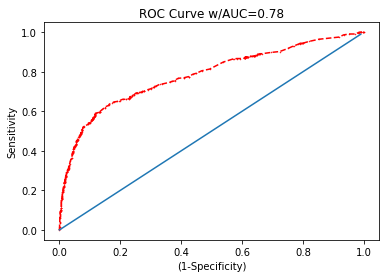

In [86]:
plt.plot(FPR,Sensitivity,marker='o',linestyle='--',color='r',markersize=0.5)
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('(1-Specificity)')
plt.ylabel('Sensitivity')
plt.title(f"ROC Curve w/AUC={round(auc,2)}")

### Note:
 The model built before does not fit in training data and test in testing data. In reality, accuracy and ROC should be tested in testing data